imports

In [14]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import re
import nltk
import spacy
import string

Load CSVs into DataFrames

In [77]:
# path to cleaned resume file
lightsail_resume_cleaned_path = '/home/ec2-user/NLP_projects/job_recommender_project/data/cleaned_resume_dataset_maitrip.csv'
local_resume_cleaned_path = '/Users/richardkuzma/coding/NLP_projects/job_recommender_project/data/cleaned_resume_dataset_maitrip.csv'
# resume_cleaned_path = lightsail_jobs_cleaned_path
resume_cleaned_path = local_resume_cleaned_path

# load cleaned jobs to df
resumes = pd.read_csv(resume_cleaned_path)
resumes.head()

,ID,Category,resume
0,1,HR,john h smith phr po box callahan fl infog...
1,2,HR,name surname address mobile noemail personal p...
2,3,HR,anthony brown hr assistant areas expertise per...
3,4,HR,id career objective pursue growth oriented ca...
4,5,HR,human resources director xefxxbexpert organiza...


In [78]:
# path to cleaned jobs file
lightsail_jobs_cleaned_path = '/home/ec2-user/NLP_projects/job_recommender_project/data/cleaned_job_posts_madhab.csv'
local_jobs_cleaned_path = '/Users/richardkuzma/coding/NLP_projects/job_recommender_project/data/cleaned_job_posts_madhab.csv'
# jobs_cleaned_path = lightsail_jobs_cleaned_path
jobs_cleaned_path = local_jobs_cleaned_path

#load cleaned resumes to df
jobs = pd.read_csv(jobs_cleaned_path)
jobs.head()

,Title,Company,JobDescription,RequiredQual,JobRequirement,label,combined
0,Chief Financial Officer,AMERIA Investment Consulting Company,AMERIA Investment Consulting Company is seekin...,"To perform this job successfully, an\r\nindivi...",- Supervises financial management and administ...,1,chief financial officer ameria investment cons...
1,Country Coordinator,Caucasus Environmental NGO Network (CENN),Public outreach and strengthening of a growing...,"- Degree in environmentally related field, or ...",- Working with the Country Director to provide...,2,country coordinator public outreach strengthen...
2,BCC Specialist,Manoff Group,The LEAD (Local Enhancement and Development fo...,"- Advanced degree in public health, social sci...",- Identify gaps in knowledge and overseeing in...,3,bcc specialist lead local enhancement developm...
3,"Community Development, Capacity Building and C...",Food Security Regional Cooperation and Stabili...,Food Security Regional Cooperation and Stabili...,- Higher Education and/or professional experie...,- Assist the Tavush Marz communities and commu...,4,community development capacity building confli...
4,Country Economist (NOB),"United Nations Development Programme, Armenia",The United Nations Development Programme in Ar...,- Minimum Masters Degree in Economics;\r\n- Mi...,The incumbent under direct supervision of UNDP...,5,country economist nob united nations developme...


<br><br><br><br><br>

# Gensim Doc2Vec on Jobs



In [17]:
from gensim.models import Doc2Vec
from gensim.models.doc2vec import TaggedDocument
from nltk import word_tokenize

In [18]:
# for i in jobs_test['combined']:
#     jobs_test['label'] = jobs_test['combined'].index
# for i in jobs_train['combined']:
#     jobs_train['label'] = jobs_train['combined'].index


In [19]:
# # see labels applied
# jobs_train.head()

In [20]:
# TaggedDocumentIterator class takes pandas text and label Series and yields TaggedDocuments
class TaggedDocumentIterator(object):
    def __init__(self, doc_list, labels_list):
        self.labels_list = labels_list
        self.doc_list = doc_list
    def __iter__(self):
        for idx, doc in enumerate(self.doc_list):
            yield TaggedDocument(words=doc.split(), tags=[self.labels_list[idx]])
 
docLabels = list(jobs['label'])
jobs_data = list(jobs['combined'])
jobs_sentences = TaggedDocumentIterator(jobs_data, docLabels)

Model will take a few min to train on laptop

In [25]:
# train Doc2Vec model on jobs

d2v_jobs_model = Doc2Vec(vector_size=100, window=10, min_count=5, workers=11,alpha=0.025, epochs=20)
d2v_jobs_model.build_vocab(jobs_sentences)
d2v_jobs_model.train(jobs_sentences,total_examples=d2v_model.corpus_count, epochs=d2v_model.iter)

/Users/richardkuzma/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: DeprecationWarning: Call to deprecated `iter` (Attribute will be removed in 4.0.0, use self.epochs instead).
  """


In [26]:
# Store the d2v jbos model to file
lightsail_d2v_model_path = '/home/ec2-user/NLP_projects/job_recommender_project/models/d2v_model_jobs.doc2vec'
local_d2v_model_path = '/Users/richardkuzma/coding/NLP_projects/job_recommender_project/models/d2v_model_jobs.doc2vec'

# save_path = lightsail_d2v_model_path
d2v_jobs_save_path = local_d2v_model_path


In [28]:
#save the model
d2v_jobs_model.save(d2v_jobs_save_path)


In [31]:
#load model
d2v_jobs_model = Doc2Vec.load(d2v_jobs_save_path)




In [33]:
type(d2v_jobs_model.docvecs)

gensim.models.keyedvectors.Doc2VecKeyedVectors

# START HERE AGAIN


credit: https://praveenbezawada.com/2018/01/25/document-similarity-using-gensim-dec2vec/

In [71]:
# def resume_test_predict(pick_a_resume_number):
def given_resume_predict_jobs():
    print("There are {} resumes\n".format(resumes.shape[0]))
    
    # Select a random int from 0 to length of resume set
    rand_int = np.random.randint(1, resumes.shape[0]+1)
    # selection = pick_a_resume_number
    selection = rand_int
    print ('selected resume is ID #{}\n'.format(selection))
    
    # pick the resume text and ID associated with the random int
    pick_text = resumes.iloc[selection -1 ]['resume']
    pick_label = resumes.iloc[selection -1, resumes.columns.get_loc('ID')] #we could grab ID, but this works for non-indexed labels too
    print('Resume ID is: {}'.format(pick_label))
    print('Resume text: {}'.format(pick_text))
    
    ####I didn't do his cleaning because I did my own. Need cleaning maybe on other stuff?
    #Clean the document using the utility functions used in train phase
    #test_sample = default_clean(test_sample)
    #test_sample = stop_and_stem(test_sample, stem=False)
 
    #Convert the sample document into a list and use the infer_vector method to get a vector representation for it
    pick_words = pick_text.split()
    pick_vec = d2v_jobs_model.infer_vector(pick_words, steps=50, alpha=0.25)
    #print('split words is: {}'.format(pick_words))
    #print('vector is: {}'.format(pick_vec))
 
    #use the most_similar utility to find the most similar documents.
    similars = d2v_jobs_model.docvecs.most_similar(positive=[pick_vec])
 
    print('\n\n\t\tSimilar job descriptions to this resume:')
    
    count = 1
    for i in similars:
        print('\nSimilar job number: {}'.format(count))
        count += 1
        print('Job ID ', i[0], ' Similarity Score: ', i[1])
        
        # pulls combined text from jobs_train 
        #print(jobs_train.iloc[i[0]]['combined'],  '\n')

        # pulls job title and description from jobs.txt
        print('Job title: {}'.format(jobs.iloc[i[0]]['Title']))
        print('Company: {}'.format(jobs.iloc[i[0]]['Company']))
        print('Description: {}'.format(jobs.iloc[i[0]]['JobDescription']))
        
        


In [72]:
given_resume_predict_jobs()

There are 1219 resumes

selected resume is ID #835

Resume ID is: 835
Resume text: business administration finance resume professional experience meridian credit union formerly hepcoe credit union mississauga ontario  present administrative assistant xefxxbheld key customer focused position first hepcoe location mississauga providing first line support xefxxbacknowledged tactfully diplomatically providing exemplary customer service patiently methodically working demanding clientele meet diverse banking needs xefxxbrecognized dealing average number customers per day   xefxxbinteracted clients inform various financial products available bank including gics rrsps resps credit lines credit cards foreign exchange mortgages loans xefxxbprocessed cheque credit card cash payments various accounts xefxxbcoordinated schedule branch manager responsible overseeing operations two meridian locations xefxxbtrained secondary customer service representative proving teller support scheduled breaks absen

#### Still need to get rid of the 'xefxxb' in resumes

# Given job, find similar resumes:

In [20]:
# TaggedDocumentIterator class takes pandas text and label Series and yields TaggedDocuments
class TaggedDocumentIterator(object):
    def __init__(self, doc_list, labels_list):
        self.labels_list = labels_list
        self.doc_list = doc_list
    def __iter__(self):
        for idx, doc in enumerate(self.doc_list):
            yield TaggedDocument(words=doc.split(), tags=[self.labels_list[idx]])
 


In [50]:
# make TaggedDocuments from resumes dataframe to then create d2v model
resumes_labels = list(resumes['ID'].astype(str))
resumes_data = list(resumes['resume'].astype(str))
resumes_sentences = TaggedDocumentIterator(resumes_data, resumes_labels)

Model will take a few min to train on laptop

In [51]:
# train Doc2Vec model on jobs

d2v_resume_model = Doc2Vec(vector_size=100, window=10, min_count=5, workers=11,alpha=0.025, epochs=20)
d2v_resume_model.build_vocab(resumes_sentences)
d2v_resume_model.train(resumes_sentences,total_examples=d2v_model.corpus_count, epochs=d2v_model.epochs)



In [52]:
# Store the d2v jbos model to file
lightsail_d2v_resume_model_path = '/home/ec2-user/NLP_projects/job_recommender_project/models/d2v_model_resumes.doc2vec'
local_d2v_resume_model_path = '/Users/richardkuzma/coding/NLP_projects/job_recommender_project/models/d2v_model_resumes.doc2vec'

# d2v_resume_save_path = lightsail_d2v_resume_model_path
d2v_resume_save_path = local_d2v_resume_model_path


In [53]:
#save the model
d2v_resume_model.save(d2v_resume_save_path)


In [54]:
#load model
d2v_resume_model = Doc2Vec.load(d2v_resume_save_path)




In [55]:
type(d2v_resume_model.docvecs)

gensim.models.keyedvectors.Doc2VecKeyedVectors

In [83]:
# def resume_test_predict(pick_a_resume_number):
def given_job_predict_similiar_resumes():
    print("There are {} jobs\n".format(jobs.shape[0]))
    
    # Select a random int from 0 to length of rjob set
    rand_int = np.random.randint(1, jobs.shape[0]+1)
    rand_int =2
    # selection = pick_a_job_number
    selection = rand_int
    print ('selected job is ID #{}\n'.format(selection))
    
    # pick the job text and ID associated with the random int
    pick_text = jobs.iloc[selection -1 ]['combined']
    pick_label = jobs.iloc[selection -1, jobs.columns.get_loc('label')] #we could grab ID, but this works for non-indexed labels too
    print('Resume ID is: {}'.format(pick_label))
    print('Resume text: {}'.format(pick_text))
    
    #Convert the sample document into a list and use the infer_vector method to get a vector representation for it
    pick_words = pick_text.split()
    pick_vec = d2v_resume_model.infer_vector(pick_words, steps=50, alpha=0.25)
    #print('split words is: {}'.format(pick_words))
    #print('vector is: {}'.format(pick_vec))
 
    #use the most_similar utility to find the most similar documents.
    similars = d2v_resume_model.docvecs.most_similar(positive=[pick_vec])
    
    
    # print('\n\nsimilars are: ', similars)
    
 
    print('\n\n\t\t\t\tSimilar candidates for this job:')
    
    count = 1
    for i in similars:
        print('\nSimilar resume number: {}'.format(count))
        count += 1
        print('Resume label ', i[0], ' Similarity Score: ', i[1])
        
        # pulls combined text from jobs_train 
        #print(jobs_train.iloc[i[0]]['combined'],  '\n')

        # pulls candidate name, info, text
        print('Candidate resume: {}'.format(resumes.iloc[int(i[0])]['resume']))
#         print('Resume: {}'.format(resumes.iloc[i[0]]['Company']))
#         print('Description: {}'.format(resumes.iloc[i[0]]['JobDescription']))
        
        


In [84]:
given_job_predict_similiar_resumes()

There are 13124 jobs

selected job is ID #2

Resume ID is: 2
Resume text: country coordinator public outreach strengthening growing network environmental ngos businesses international organizations public agencies serve primary contact cenn public full time position working country director provide environmental information general public via regular electronic communications serving primary local contact armenian ngos businesses armenian offices international organizations agencies helping organize prepare cenn seminars workshops participating defining strategy policy cenn armenia caucasus region abroad degree environmentally related field  years relevant experience oral written fluency armenian russian english knowledge experience working environmental issues specific armenia plus remuneration salary commensurate experience


				Similar candidates for this job:

Similar resume number: 1
Resume label  298  Similarity Score:  0.3004753589630127
Candidate resume: your name  west th str

### still need to get 'xefxxb', 'xexxa', out of resumes

<br>
<br>
<br>
<br>
<br>

# K Means Clustering
Appears that our embeddings are pretty close together. So either the resumes are similar or the embeddings aren't great

https://medium.com/@ermolushka/text-clusterization-using-python-and-doc2vec-8c499668fa61

In [85]:
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

### KMeans for job vectors

/Users/richardkuzma/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: DeprecationWarning: Call to deprecated `doctag_syn0` (Attribute will be removed in 4.0.0, use docvecs.vectors_docs instead).
  """
/Users/richardkuzma/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:9: DeprecationWarning: Call to deprecated `doctag_syn0` (Attribute will be removed in 4.0.0, use docvecs.vectors_docs instead).
  if __name__ == '__main__':
/Users/richardkuzma/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:10: DeprecationWarning: Call to deprecated `doctag_syn0` (Attribute will be removed in 4.0.0, use docvecs.vectors_docs instead).
  # Remove the CWD from sys.path while we load stuff.
/Users/richardkuzma/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:11: DeprecationWarning: Call to deprecated `doctag_syn0` (Attribute will be removed in 4.0.0, use docvecs.vectors_docs instead).
  # This is added back by InteractiveShellApp.init_path()


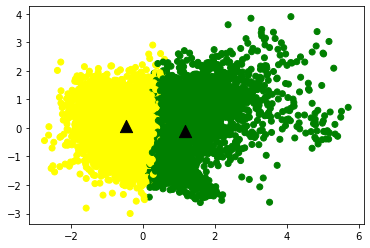

In [91]:
# define number of clusters here
kmeans_jobs_model = KMeans(n_clusters=2) 


X = kmeans_jobs_model.fit(d2v_jobs_model.docvecs.doctag_syn0)
labels=kmeans_jobs_model.labels_.tolist()


l = kmeans_jobs_model.fit_predict(d2v_jobs_model.docvecs.doctag_syn0)
pca = PCA(n_components=2).fit(d2v_jobs_model.docvecs.doctag_syn0)
datapoint = pca.transform(d2v_jobs_model.docvecs.doctag_syn0)

plt.figure
label1 = ["#FFFF00", "#008000", "#0000FF", "#800080"]
color = [label1[i] for i in labels]
plt.scatter(datapoint[:, 0], datapoint[:, 1], c=color)

centroids = kmeans_jobs_model.cluster_centers_
centroidpoint = pca.transform(centroids)
plt.scatter(centroidpoint[:, 0], centroidpoint[:, 1], marker='^', s=150, c='#000000')
plt.show()

### KMeans for resumes

/Users/richardkuzma/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: DeprecationWarning: Call to deprecated `doctag_syn0` (Attribute will be removed in 4.0.0, use docvecs.vectors_docs instead).
  """
/Users/richardkuzma/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:9: DeprecationWarning: Call to deprecated `doctag_syn0` (Attribute will be removed in 4.0.0, use docvecs.vectors_docs instead).
  if __name__ == '__main__':
/Users/richardkuzma/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:10: DeprecationWarning: Call to deprecated `doctag_syn0` (Attribute will be removed in 4.0.0, use docvecs.vectors_docs instead).
  # Remove the CWD from sys.path while we load stuff.
/Users/richardkuzma/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:11: DeprecationWarning: Call to deprecated `doctag_syn0` (Attribute will be removed in 4.0.0, use docvecs.vectors_docs instead).
  # This is added back by InteractiveShellApp.init_path()


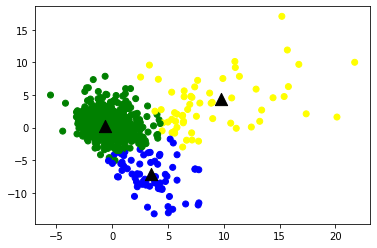

In [98]:
# define number of clusters here
kmeans_resumes_model = KMeans(n_clusters=3) 


X = kmeans_resumes_model.fit(d2v_resume_model.docvecs.doctag_syn0)
labels=kmeans_resumes_model.labels_.tolist()


l = kmeans_resumes_model.fit_predict(d2v_resume_model.docvecs.doctag_syn0)
pca = PCA(n_components=2).fit(d2v_resume_model.docvecs.doctag_syn0)
resume_datapoint = pca.transform(d2v_resume_model.docvecs.doctag_syn0)

plt.figure
label2 = ["#FFFF00", "#008000", "#0000FF", "#800080"]
color = [label2[i] for i in labels]
plt.scatter(resume_datapoint[:, 0], resume_datapoint[:, 1], c=color)

resume_centroids = kmeans_resumes_model.cluster_centers_
resume_centroidpoint = pca.transform(resume_centroids)
plt.scatter(resume_centroidpoint[:, 0], resume_centroidpoint[:, 1], marker='^', s=150, c='#000000')
plt.show()